In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [15]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv', index_col='Year', float_precision='legacy')
    
    sea_level = df['CSIRO Adjusted Sea Level']
    year = df.index
    
    # Create scatter plot
    plt.scatter(year, sea_level)

    # Create first line of best fit
    slope, intercept, rvalue, pvalue, stderr = linregress(year, sea_level)
    year_prediction = list(range(1880, 2051))
    first_line = [intercept + slope * year for year in year_prediction]
    plt.plot(year_prediction, first_line, linewidth=2, color="red")
    
    # Create second line of best fit

    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title("Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

      CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
Year                                                                   
2000                  7.062992           6.791339           7.334646   
2001                  7.287402           7.019685           7.555118   
2002                  7.381890           7.110236           7.653543   
2003                  7.759843           7.484252           8.035433   
2004                  7.740157           7.464567           8.015748   
2005                  7.744094           7.472441           8.015748   
2006                  7.917323           7.645669           8.188976   
2007                  7.996063           7.712598           8.279528   
2008                  8.350394           8.078740           8.622047   
2009                  8.586614           8.311024           8.862205   
2010                  8.901575           8.618110           9.185039   
2011                  8.964567           8.661417           9.26

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

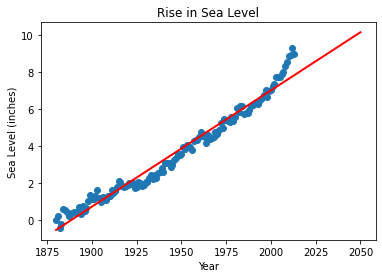

In [16]:
draw_plot()